In [1]:
# for reading data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# For data splitting
from sklearn.model_selection import train_test_split

from sklearn import svm # SVM
from sklearn.tree import DecisionTreeClassifier # DTR
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # LR
from sklearn.model_selection import GridSearchCV

# classification error metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("TrainingData3.xlsx")

# Head, Shape, Column names, data types, missing values, Outliers

In [3]:
df.head()

,0,1960,1
0,0.05,1960,1
1,0.10,1960,1
2,0.15,1960,1
3,0.20,1960,1
4,0.25,1960,1


In [4]:
df.columns=['Depth','Speed','Stability']
df.head()

,Depth,Speed,Stability
0,0.05,1960,1
1,0.10,1960,1
2,0.15,1960,1
3,0.20,1960,1
4,0.25,1960,1


In [5]:
#Summary of original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      1070 non-null   float64
 1   Speed      1070 non-null   int64  
 2   Stability  1070 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 25.2 KB


In [6]:
#Shape of original dataset
df.shape

(1070, 3)

There are a total of 45,466 movies with 24 features. Most of the features have very few NaN values (apart from homepage and tagline). We will attempt at cleaning this dataset to a form suitable for analysis in the next section.

Text(0, 0.5, 'Frequency')

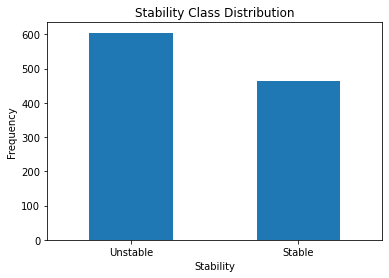

In [7]:
# voter_rating vs frequency plot
df.value_counts(df['Stability']).plot(kind='bar',rot=0)
plt.title("Stability Class Distribution")
LABELS=['Unstable','Stable']
plt.xticks(range(2), LABELS)
plt.xlabel("Stability")
plt.ylabel("Frequency")

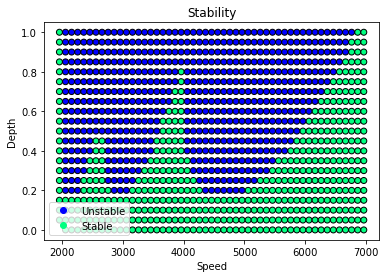

In [8]:
scatter = plt.scatter(df['Speed'], df['Depth'], c=df['Stability'],cmap='winter',alpha=1,edgecolors='black')
plt.legend(handles=scatter.legend_elements()[0], labels=['Unstable','Stable'])
plt.xlabel('Speed')
plt.ylabel('Depth')
plt.title('Stability')
plt.show()

# Split Data into X and Y

In [9]:
# Assign X and Y
X_train = df.drop(['Stability'], axis=1)
y_train = df['Stability']

print(X_train.shape)
print(y_train.shape)

(1070, 2)
(1070,)


In [10]:
df_test=pd.read_excel('TestinData.xlsx')
df_test.columns=['Depth','Speed','Stability']
df_test.head()

,Depth,Speed,Stability
0,0.01,1960,1
1,0.02,1960,1
2,0.03,1960,1
3,0.04,1960,1
4,0.05,1960,1


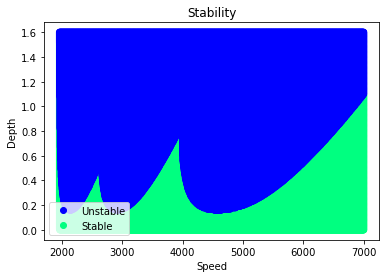

In [11]:
scatter = plt.scatter(df_test['Speed'], df_test['Depth'], c=df_test['Stability'],cmap='winter',alpha=1)
plt.legend(handles=scatter.legend_elements()[0], labels=['Unstable','Stable'])
plt.xlabel('Speed')
plt.ylabel('Depth')
plt.title('Stability')
plt.show()

In [12]:
# Assign X and Y
X_test = df_test.drop(['Stability'], axis=1)
y_test = df_test['Stability']

print(X_test.shape)
print(y_test.shape)

(162448, 2)
(162448,)


In [13]:
# shape check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 2) (162448, 2) (1070,) (162448,)


# 1) Logistic Regression Model

In [14]:
#Fit the model
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)

In [15]:
# store the predictions
train_preds_LR = LR.predict(X_train) 
test_preds_LR = LR.predict(X_test) 

In [16]:
#Evaluate the model
# train confusion matrix
confusion_matrix(y_train, train_preds_LR)

array([[527,  78],
       [135, 330]], dtype=int64)

In [17]:
# test confusion matrix
confusion_matrix(y_test, test_preds_LR)

array([[111369,   8283],
       [ 11642,  31154]], dtype=int64)

In [18]:
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_LR).ravel()
(tn, fp, fn, tp)

(111369, 8283, 11642, 31154)

In [19]:
ac1 = accuracy_score(y_test,test_preds_LR)
print('accuracy for Logistic regression =', round(ac1*100,5) , '%')
print(classification_report(y_test, test_preds_LR))

accuracy for Logistic regression = 87.73454 %
              precision    recall  f1-score   support

           0       0.91      0.93      0.92    119652
           1       0.79      0.73      0.76     42796

    accuracy                           0.88    162448
   macro avg       0.85      0.83      0.84    162448
weighted avg       0.87      0.88      0.88    162448



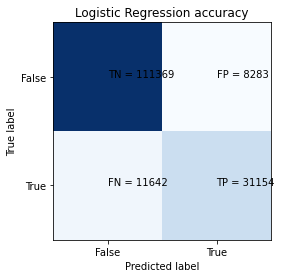

In [20]:
cm = confusion_matrix(y_test, test_preds_LR)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['False','True']
plt.title('Logistic Regression accuracy')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

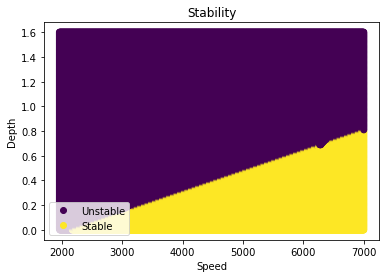

In [21]:
scatter = plt.scatter(X_test.iloc[:,1], X_test.iloc[:,0], c=test_preds_LR,alpha=1)
plt.legend(handles=scatter.legend_elements()[0], labels=['Unstable','Stable'])
plt.xlabel('Speed')
plt.ylabel('Depth')
plt.title('Stability')
plt.show()

## 2) SVM

In [22]:
svc = svm.SVC(kernel='rbf',C=10,gamma=1)
svc.fit(X_train,y_train)

SVC(C=10, gamma=1)

In [23]:
y_pred = svc.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [24]:
cm = confusion_matrix(y_test, y_pred)
ac4 = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print('accuracy =',ac4)
print(cr)

[[  5727 113925]
 [    19  42777]]
accuracy = 0.2985816999901507
              precision    recall  f1-score   support

           0       1.00      0.05      0.09    119652
           1       0.27      1.00      0.43     42796

    accuracy                           0.30    162448
   macro avg       0.63      0.52      0.26    162448
weighted avg       0.81      0.30      0.18    162448



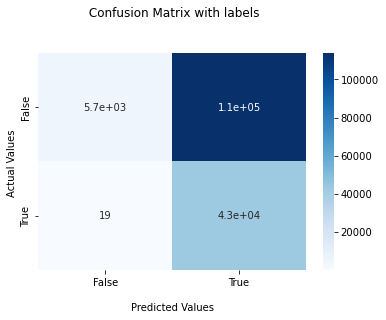

In [25]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

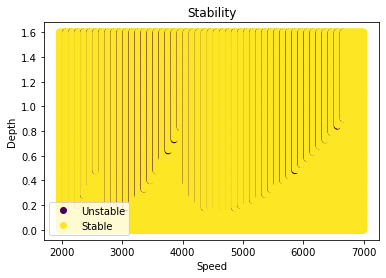

In [26]:
scatter = plt.scatter(X_test.iloc[:,1], X_test.iloc[:,0], c=y_pred,alpha=1)
plt.legend(handles=scatter.legend_elements()[0], labels=['Unstable','Stable'])
plt.xlabel('Speed')
plt.ylabel('Depth')
plt.title('Stability')
plt.show()

## 3) KNN

In [27]:
param_grid = {'n_neighbors': [2, 4, 6, 8, 10]}
 
knn = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 1)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10]}, verbose=1)

In [28]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
cm = confusion_matrix(y_test, y_pred)
ac5 = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print('accuracy =',ac5)
print(cr)

[[113597   6055]
 [  5867  36929]]
accuracy = 0.9266103614695164
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    119652
           1       0.86      0.86      0.86     42796

    accuracy                           0.93    162448
   macro avg       0.91      0.91      0.91    162448
weighted avg       0.93      0.93      0.93    162448



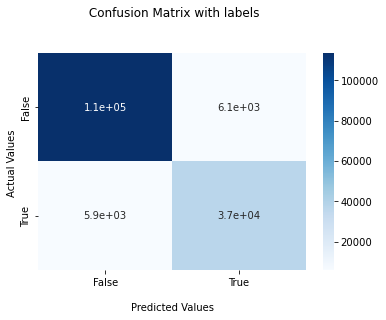

In [30]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## 4) Decision Tree Classifier:

In [31]:
param_grid = {'criterion':['entropy','gini'],
              'max_depth':[2,4,6,8,10,12]}
 
dt = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 1)
dt.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=1)

In [32]:
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
cm = confusion_matrix(y_test, y_pred)
ac6 = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print('accuracy =',ac6)
print(cr)

[[113038   6614]
 [  8382  34414]]
accuracy = 0.9076873830394957
              precision    recall  f1-score   support

           0       0.93      0.94      0.94    119652
           1       0.84      0.80      0.82     42796

    accuracy                           0.91    162448
   macro avg       0.88      0.87      0.88    162448
weighted avg       0.91      0.91      0.91    162448



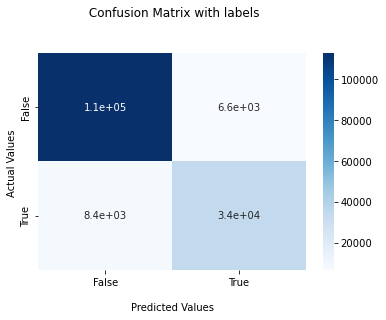

In [34]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [35]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from IPython.display import Image
import os

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
tree.export_graphviz(dt.best_estimator_,out_file='tree.dot') 
dot_data = StringIO() 
tree.export_graphviz(dt.best_estimator_, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
a=graph.write_png("tree.png") 
Image(filename=os.getcwd()+'/tree.png')